In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('fct_invoice.csv')
customer = pd.read_json('dim_customer.json')
customer.to_csv('dim_customer,csv',index=False)
df.head()

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon


In [5]:
# Easy

In [13]:
# 1. How many unique customers are in the dataset?

unique_customers_count = df['customer_id'].nunique()

print(unique_customers_count)

5191


In [33]:
# 2. What are the different categories of products available? How many unique categories are there?

categories = df['category'].unique()
categories_count = df['category'].nunique()

print(categories)
print(categories_count)

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
8


In [55]:
# 3. Which payment method is the most popular? How many times was it used?

popular_payment_method = df['payment_method'].value_counts()
popular_payment_method_count = df['payment_method'].value_counts()
print(popular_payment_method)
print(popular_payment_method_count.max())

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64
44447


In [57]:
# Medium

In [71]:
# 1. What are the three most popular categories, by total
df['total_sales'] = df['price'] * df['quantity']
popular_categories = df.groupby(['category']).sum('total_sales').sort_values('price', ascending=False)
print(popular_categories.head(3))

            customer_id  quantity        price   total_sales
category                                                    
Clothing       34578159    103558  31075684.64  1.139968e+08
Shoes           9901187     30217  18135336.89  6.655345e+07
Technology      5069499     15021  15772050.00  5.786235e+07


In [77]:
# 2. What are the total sales attributed to customers over the age of 45?

total_sales = pd.merge(df, customer, left_on = 'customer_id', right_on = 'id')
total_sales_over_45 = total_sales[total_sales['age'] > 45]
total_sales_over_45['total_sales'].sum()

82039768.15

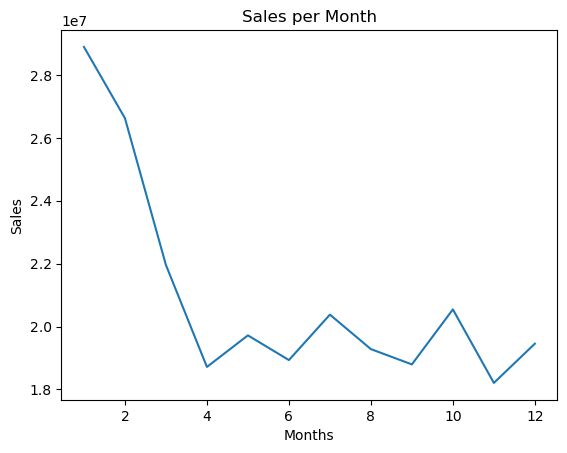

In [99]:
# 3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%d/%m/%Y')
trends_per_month = df.groupby(df['invoice_date'].dt.month).sum(numeric_only=True)
x = trends_per_month.index
y = trends_per_month['total_sales']
plt.plot(x,y)
plt.xlabel('Months')
plt.ylabel('Sales')
plt.title('Sales per Month')
plt.show()

In [101]:
# Hard

In [ ]:
# 1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

#??? sorry